In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet
# dataframes creation for both training and testing datasets 
from google.colab import files
uploaded = files.upload()
import io
history_df = pd.read_csv(io.BytesIO(uploaded['History.csv']))

Saving History.csv to History (6).csv


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


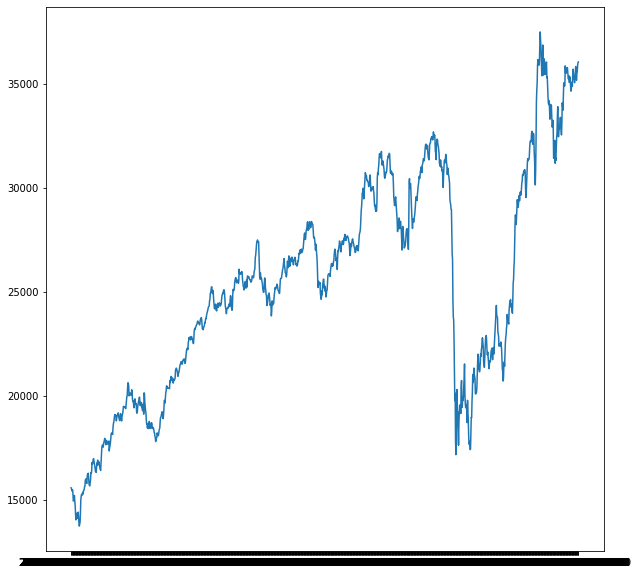

In [2]:
history_df.head()
history_df.tail(20)
history_df = history_df.sort_values("Date")
plt.figure(figsize=(10,10))
plt.plot(history_df['Date'], history_df['AveragePrice'])
history_df
history_prophet_df = history_df[['Date', 'AveragePrice']] 
history_prophet_df
history_prophet_df = history_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})
history_prophet_df
m = Prophet()
m.fit(history_prophet_df)

In [25]:
future = m.make_future_dataframe(periods=20, freq='D')
forecast = m.predict(future)
forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1346,2021-07-05,37757.691820,35621.931445,39112.959368,37757.691820,37757.691820,-320.241577,-320.241577,-320.241577,-222.331250,-222.331250,-222.331250,-97.910327,-97.910327,-97.910327,0.0,0.0,0.0,37437.450243
1347,2021-07-06,37802.429595,35799.172763,39345.927409,37802.429595,37802.429595,-299.344555,-299.344555,-299.344555,-221.656288,-221.656288,-221.656288,-77.688267,-77.688267,-77.688267,0.0,0.0,0.0,37503.085041
1348,2021-07-07,37847.167371,35818.198700,39345.100766,37847.167371,37847.167371,-299.374155,-299.374155,-299.374155,-245.034352,-245.034352,-245.034352,-54.339803,-54.339803,-54.339803,0.0,0.0,0.0,37547.793216
1349,2021-07-08,37891.905146,35816.741626,39371.446282,37891.905146,37891.905146,-228.475551,-228.475551,-228.475551,-200.097374,-200.097374,-200.097374,-28.378177,-28.378177,-28.378177,0.0,0.0,0.0,37663.429595
1350,2021-07-09,37936.642922,36010.958162,39449.193480,37936.642922,37936.642922,-219.104937,-219.104937,-219.104937,-218.727578,-218.727578,-218.727578,-0.377359,-0.377359,-0.377359,0.0,0.0,0.0,37717.537985
1351,2021-07-12,38070.856248,36282.359257,39726.961554,38070.856248,38070.856248,-132.857295,-132.857295,-132.857295,-222.331250,-222.331250,-222.331250,89.473955,89.473955,89.473955,0.0,0.0,0.0,37937.998954
1352,2021-07-13,38115.594024,36217.527118,39670.903232,38115.594024,38115.594024,-102.529874,-102.529874,-102.529874,-221.656288,-221.656288,-221.656288,119.126414,119.126414,119.126414,0.0,0.0,0.0,38013.064150
1353,2021-07-14,38160.331800,36282.732688,39850.395193,38160.331800,38160.331800,-97.536850,-97.536850,-97.536850,-245.034352,-245.034352,-245.034352,147.497502,147.497502,147.497502,0.0,0.0,0.0,38062.794949
1354,2021-07-15,38205.069575,36433.406403,39890.703577,38205.069575,38205.069575,-26.163897,-26.163897,-26.163897,-200.097374,-200.097374,-200.097374,173.933477,173.933477,173.933477,0.0,0.0,0.0,38178.905678
1355,2021-07-16,38249.807351,36565.092635,39931.739726,38249.807351,38249.807351,-20.909864,-20.909864,-20.909864,-218.727578,-218.727578,-218.727578,197.817714,197.817714,197.817714,0.0,0.0,0.0,38228.897486


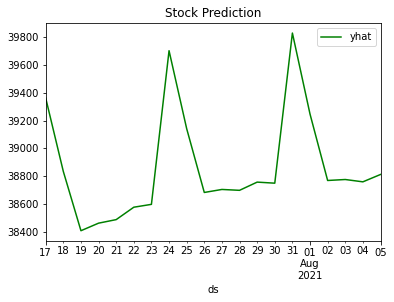

In [26]:
#figure = m.plot(forecast, xlabel='Date', ylabel='Price', )
forecast_day = forecast.tail(20)
import pandas as pd
import matplotlib.pyplot as plt

#Get current axis
ax = plt.gca() 
# line plot for math marks
forecast_day.plot(kind = 'line',
        x = 'ds',
        y = 'yhat',
        color = 'green',ax = ax)  
# set the title
plt.title('Stock Prediction')  
# show the plot
plt.show()

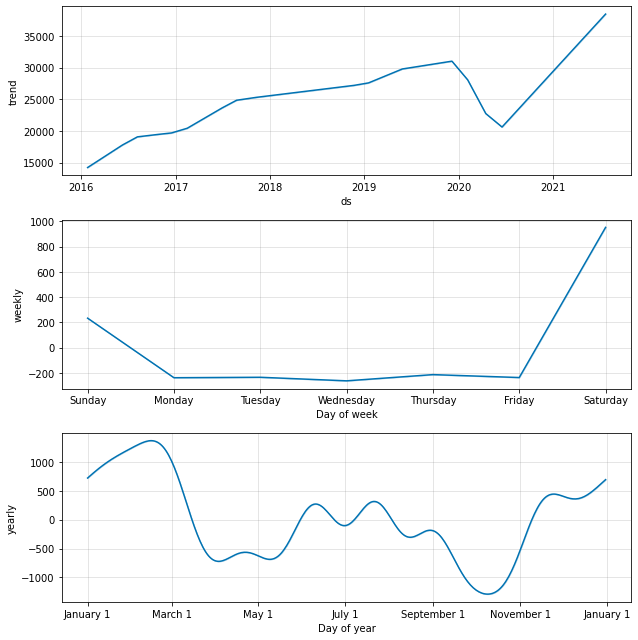

In [11]:
figure3 = m.plot_components(forecast)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12758.815, Time=1.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12846.783, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12771.126, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12757.008, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12851.197, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12756.951, Time=0.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12756.787, Time=1.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12761.034, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=12758.159, Time=1.70 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12756.507, Time=1.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12757.385, Time=0.46 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12758.365, Time=1.82 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=12758.841, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12760.379, Time=0.86 sec
 ARIMA(1,1,2)(0,0,0

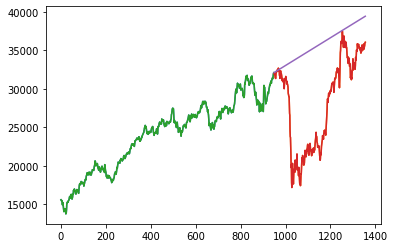

        Prediction
949   32122.933629
950   32142.409449
951   32159.454078
952   32178.174240
953   32195.739655
...            ...
1351  39374.478167
1352  39392.514715
1353  39410.551264
1354  39428.587812
1355  39446.624361

[407 rows x 1 columns]


In [45]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

#divide into train and validation set
train = history_prophet_df[:int(0.7*(len(history_prophet_df)))]
valid = history_prophet_df[int(0.7*(len(history_prophet_df))):]

#preprocessing (since arima takes univariate series as input)
train.drop('ds',axis=1,inplace=True)
valid.drop('ds',axis=1,inplace=True)

#plotting the data
train['y'].plot()
valid['y'].plot()

# Fit your model
model = pm.auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()
print(forecast)

In [3]:
history_prophet_df.tail(20)

,ds,y
1336,2021-06-21 00:00:00,34662.80
1337,2021-06-22 00:00:00,35079.85
1338,2021-06-23 00:00:00,34883.15
1339,2021-06-24 00:00:00,34905.35
1340,2021-06-25 00:00:00,35437.10
1341,2021-06-28 00:00:00,35716.80
1342,2021-06-29 00:00:00,35493.45
1343,2021-06-30 00:00:00,35263.35
1344,2021-07-01 00:00:00,35207.70
1345,2021-07-02 00:00:00,35063.85


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning:

The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 



1356    36063.783885
1357    35905.657162
1358    35883.896571
1359    35999.900838
1360    36237.481117
1361    36098.021660
1362    35854.074336
dtype: float64


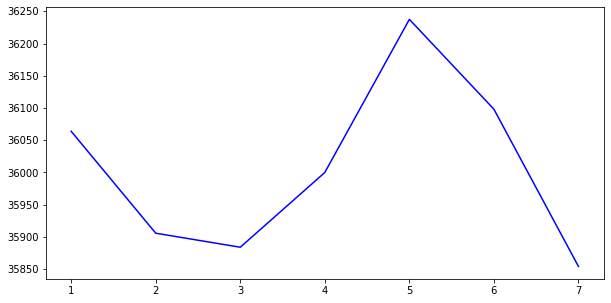

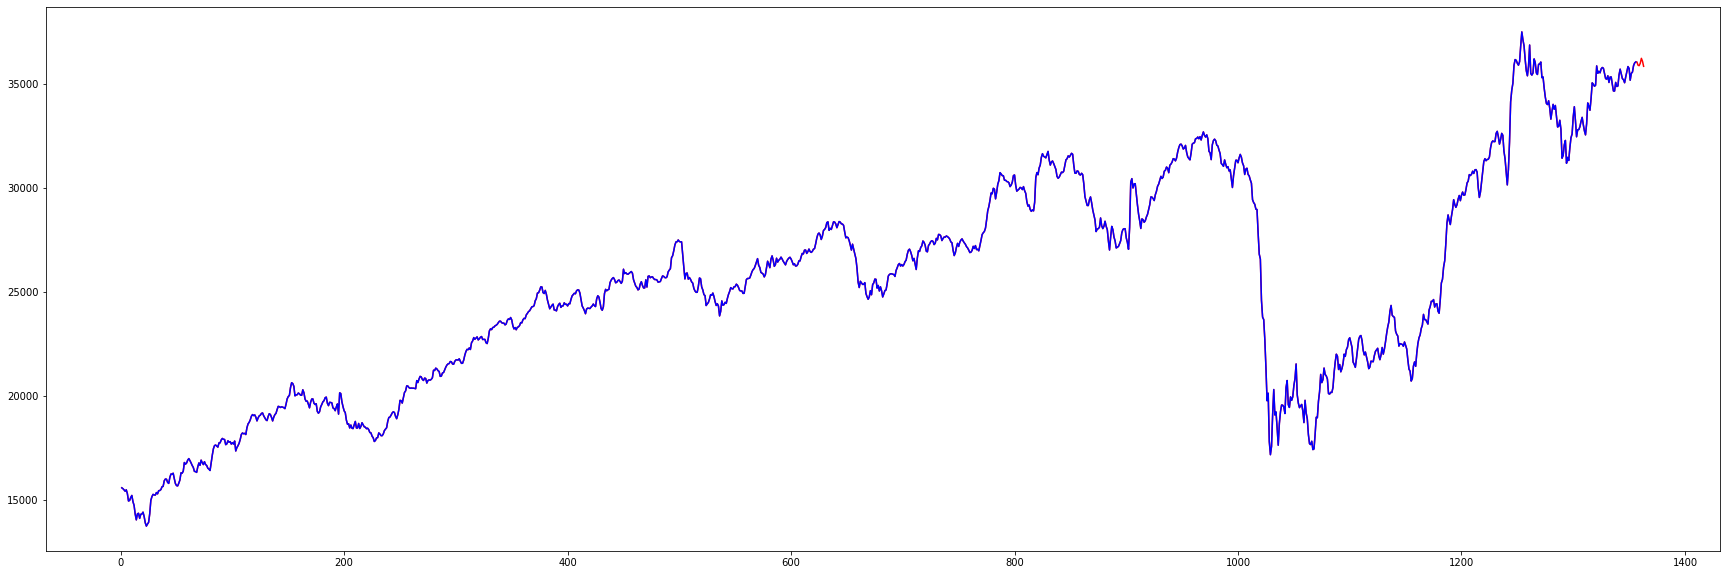

In [33]:
# The autoregressive model determines that the output variable is linearly dependent on its own previous values and on the stochastic term (responsible for a parameter that cannot be fully predicted). 
# The model takes the form of a stochastic difference equation (or a recurrence relation, but not in the form of a differential equation).
from statsmodels.tsa.ar_model import AutoReg
import numpy
# fit model
model = AutoReg(history_prophet_df['y'], lags=100)
model_fit = model.fit()
# let's make prediction
y = model_fit.predict(len(history_prophet_df['y']), len(history_prophet_df['y'])+6)
print(y)
 
plt.figure(figsize=(10,5))
plt.plot(range(1,len(y)+1), y, 'b')
plt.show()

plt.figure(figsize=(30,10))
prognose = numpy.concatenate((history_prophet_df['y'],y))
plt.plot(range(1,len(prognose)+1), prognose, 'r')
plt.plot(range(1,len(history_prophet_df['y'])+1), history_prophet_df['y'], 'b')
plt.show()